In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# The path to our CSV file
file = "data.csv"

# Read our ECommerce data into pandas
df = pd.read_csv(file, encoding= 'unicode_escape')

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Year,Timestamp,Revenue,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12/1/2010,12,2010,2010-12-01 08:26:00,15.30,8,26
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,12,2010,2010-12-01 08:26:00,20.34,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12/1/2010,12,2010,2010-12-01 08:26:00,22.00,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,12,2010,2010-12-01 08:26:00,20.34,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,12,2010,2010-12-01 08:26:00,20.34,8,26


In [3]:
# Extrapolate just date
df['Date'] = df['InvoiceDate'].str[0:9]

In [4]:
# Extrapolate just month
df['Month'] = df['InvoiceDate'].str[0:2]

In [5]:
# Extrapolate just year
df['Year'] = df['InvoiceDate'].str[5:9]

In [6]:
# Convert InvoiceDate to timestamp
df['Timestamp']=df['InvoiceDate']
df['Timestamp'] = pd.to_datetime(df.Timestamp)

In [7]:
# Create revenue column
df['Revenue'] = df['Quantity']*df['UnitPrice']

In [8]:
# Sum revenue for each month
df_month_revenue = df.groupby('Month').sum()

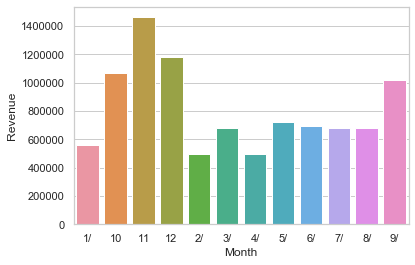

In [10]:
# Barplot of revenue for each month
sns.set(style="whitegrid")
sns.barplot(x = df_month_revenue.index, y = df_month_revenue.Revenue)

In [13]:
# Create columns for hour and minute ordered
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute

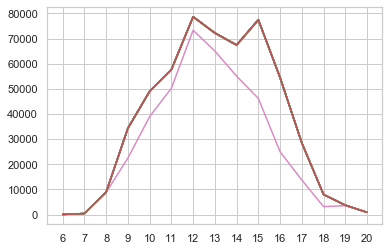

In [21]:
# Chart of Hours ordered

hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.show()

In [63]:
# Find what products are purchased the most
df_product_quant = df.groupby(["StockCode", 'Description']).sum().sort_values("Quantity", ascending=False)
df_product_quant.head(10)

,,Quantity,UnitPrice,CustomerID,Revenue,Hour,Minute
StockCode,Description,,,,,,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,173.39,7297844.0,13587.93,6857,16022
85099B,JUMBO BAG RED RETROSPOT,47363,5333.30,25396253.0,92356.03,27423,66155
84879,ASSORTED COLOUR BIRD ORNAMENT,36381,2584.77,21602517.0,58959.73,19057,44686
22197,POPCORN HOLDER,36334,874.50,10688216.0,33969.46,11148,26141
21212,PACK OF 72 RETROSPOT CAKE CASES,36039,1047.04,16309247.0,21059.72,17801,41162
85123A,WHITE HANGING HEART T-LIGHT HOLDER,35025,7145.96,32213017.0,97715.99,29489,69025
23084,RABBIT NIGHT LIGHT,30680,2496.53,12795186.0,66756.59,13671,31438
22492,MINI PAINT SET VINTAGE,26437,304.81,4919126.0,16810.42,4847,11871
22616,PACK OF 12 LONDON TISSUES,26315,236.87,6256466.0,7972.76,7061,15623


In [64]:
# Find what products yield the highest revenue
df_product_revenue = df.groupby(["StockCode", 'Description']).sum().sort_values("Revenue", ascending=False)
df_product_revenue.head(10)

,,Quantity,UnitPrice,CustomerID,Revenue,Hour,Minute
StockCode,Description,,,,,,
DOT,DOTCOM POSTAGE,707,206252.06,225536.0,206245.48,9755,19853
22423,REGENCY CAKESTAND 3 TIER,13033,30360.61,28473438.0,164762.19,28014,66777
47566,PARTY BUNTING,18022,9979.62,21766527.0,98302.98,22058,51783
85123A,WHITE HANGING HEART T-LIGHT HOLDER,35025,7145.96,32213017.0,97715.99,29489,69025
85099B,JUMBO BAG RED RETROSPOT,47363,5333.30,25396253.0,92356.03,27423,66155
23084,RABBIT NIGHT LIGHT,30680,2496.53,12795186.0,66756.59,13671,31438
POST,POSTAGE,3003,46388.47,15425584.0,66230.64,15222,39078
22086,PAPER CHAIN KIT 50'S CHRISTMAS,18902,4054.90,15914479.0,63791.94,15584,37150
84879,ASSORTED COLOUR BIRD ORNAMENT,36381,2584.77,21602517.0,58959.73,19057,44686
